# 데이터 불러오기 + Resize 하기

In [3]:
from PIL import Image
import os, glob

print ("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [9]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 35x35 사이즈로 바꾸어 저장합니다.
    target_size=(35,35)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 resize 후 저장
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [10]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 resize 후 저장
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [11]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 resize 후 저장
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [44]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=35
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

이미지 개수는 300 입니다.
x_train shape: (300, 35, 35, 3)
y_train shape: (300,)


라벨: 0


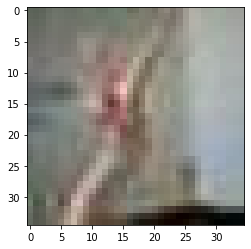

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨:',y_train[0])

# 딥러닝 네트워크 설계하기

In [67]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

#seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

#하이퍼파라미터들
n_channel_1=256
n_channel_2=256
n_dense=128
n_train_epoch=30

#딥러닝 네트워크 모델 설계하기
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(35,35,3)))
model.add(keras.layers.MaxPool2D(3,3))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((3,3)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 33, 33, 256)       7168      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 256)         590080    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

# 딥러닝 네트워크 학습시키기

In [68]:
x_train_reshaped=x_train_norm.reshape(-1, 35, 35, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

After Reshape - x_train_reshaped shape: (300, 35, 35, 3)
Epoch 1/30
10/10 [==============================] - 1s 13ms/step - loss: 1.7069 - accuracy: 0.2670
Epoch 2/30
10/10 [==============================] - 0s 12ms/step - loss: 1.1810 - accuracy: 0.3091
Epoch 3/30
10/10 [==============================] - 0s 13ms/step - loss: 1.1113 - accuracy: 0.3285
Epoch 4/30
10/10 [==============================] - 0s 12ms/step - loss: 1.0864 - accuracy: 0.3596
Epoch 5/30
10/10 [==============================] - 0s 12ms/step - loss: 1.0617 - accuracy: 0.4243
Epoch 6/30
10/10 [==============================] - 0s 13ms/step - loss: 1.1207 - accuracy: 0.4532
Epoch 7/30
10/10 [==============================] - 0s 12ms/step - loss: 1.0150 - accuracy: 0.5793
Epoch 8/30
10/10 [==============================] - 0s 12ms/step - loss: 0.9096 - accuracy: 0.6078
Epoch 9/30
10/10 [==============================] - 0s 13ms/step - loss: 0.9728 - accuracy: 0.5246
Epoch 10/30
10/10 [==============================] -

# 테스트 하기

In [53]:
#테스트용 이미지 resize 하기
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.


In [54]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

이미지 개수는 300 입니다.


In [69]:
x_test_reshaped=x_test_norm.reshape(-1, 35, 35, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

model.evaluate(x_test_reshaped, y_test)

10/10 [==============================] - 0s 6ms/step - loss: 0.9335 - accuracy: 0.6067


[0.9335184693336487, 0.6066666841506958]

# conclusion

## 요약 

* 데이터 불러오기 + resize 하기 : 
    훈련할 이미지들을 열고 resize 해서 다시 저장 후 numpy의 array에 이미지들을 복사했다.

* 딥러닝 네트워크 설계하기 : 
    여러 레이어들을 중첩해서 네트워크를 설계했다. 네트워크에 쓰이는 여러 값들을 하이어파라미터로 지정해서 조절했다.

* 딥러닝 네트워크 학습시키기 : 
    고급경사하강법 중 아담을 이용하여 딥러닝 네트워크를 학습시켰다.

* 테스트하기 : 
    다른 사람의 가위바위보 이미지들을 이용해서 정확도를 산출했다. 

## 회고
    test accuracy가 60%이상이 되도록 하는 것이 생각보다 어려웠다. 먼저 이미지 사이즈를 35X35로 늘리고, 하이어파라미터들의 값을 무조건 늘리는 식으로 조절했다. 하지만 n_train_epoch를 40으로 바꿨을 때 30일 때보다 더 정확도가 낮아진다는 사실을 알고 무조건 늘리는게 답은 아니라는 생각을 했다. 따라서 어느 한 파라미터를 많이 올리기 보다는 다같이 조금씩 올리는 방식으로 했고, 하이어 파라미터 뿐만 아니라 maxpooling의 pool size도 3X3으로 늘렸다. 그리고 다른 값들은 코드를 수정하는 일이 없었는데, 이미지 사이즈를 조절했을 때 다른 부분의 코드들을 수정해야 해서 그 점이 조금 어려웠다.